<h1 align="center">Experiment No. 05</h1>
<hr>

<p style="font-size:20px;"><i> Write a program to verify the following properties of a given systems in continuous time $$\begin{aligned} &(i) Causal\ and\ Non-causal\ Systems
&(ii) Static\ (Memory\ less)\ and\ Dynamic\ (with Memory)\ Systems\ 
&(iii) Linear\ and\ Nonlinear\ Systems\ and\ 
&(vi) Time-Invariant\ and\ Time-Variant\ Systems.\end{aligned}$$</i></p>
<hr>

<p style="font-size:20px">Import libraries and plot setup.</p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sin,cos

In [2]:
def getPlotReady(title='',xLabel='', yLabel='', figSize=None):
    fig = plt.figure()
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
        
    ax = fig.add_subplot(1,1,1)
    ax.set_title(title,fontdict={'fontsize': 20}, pad=15.0)
    ax.set_xlabel(xLabel,fontdict={'fontsize': 16})
    ax.set_ylabel(yLabel,fontdict={'fontsize': 16})

In [3]:
def getReadySubplot(signals,title = 'Multiple Signal in subplot.', figSize=None):
    numOfPlot = len(signals)
    fig, axes = plt.subplots(numOfPlot, 1) 
    if figSize != None:
        fig.set_size_inches(figSize[0], figSize[1])
    fig.suptitle(title, fontsize=20, y=0.93)
    for index in range(numOfPlot):
        axes[index].plot(signals[index]['x'],signals[index]['y'])
        axes[index].set_title(signals[index]['title'])
        axes[index].set_xlabel(signals[index]['xlabel'])
        axes[index].set_ylabel(signals[index]['ylabel'])

<p style="font-size:20px;">$$\begin{aligned}&(i)Causal\ and\ Non-causal\ Systems \end{aligned} $$</p>

In [30]:
def rectSignal(times, position=0,width=5):
    return [1 if t >= position and t <= position + width else 0 for t in times ]

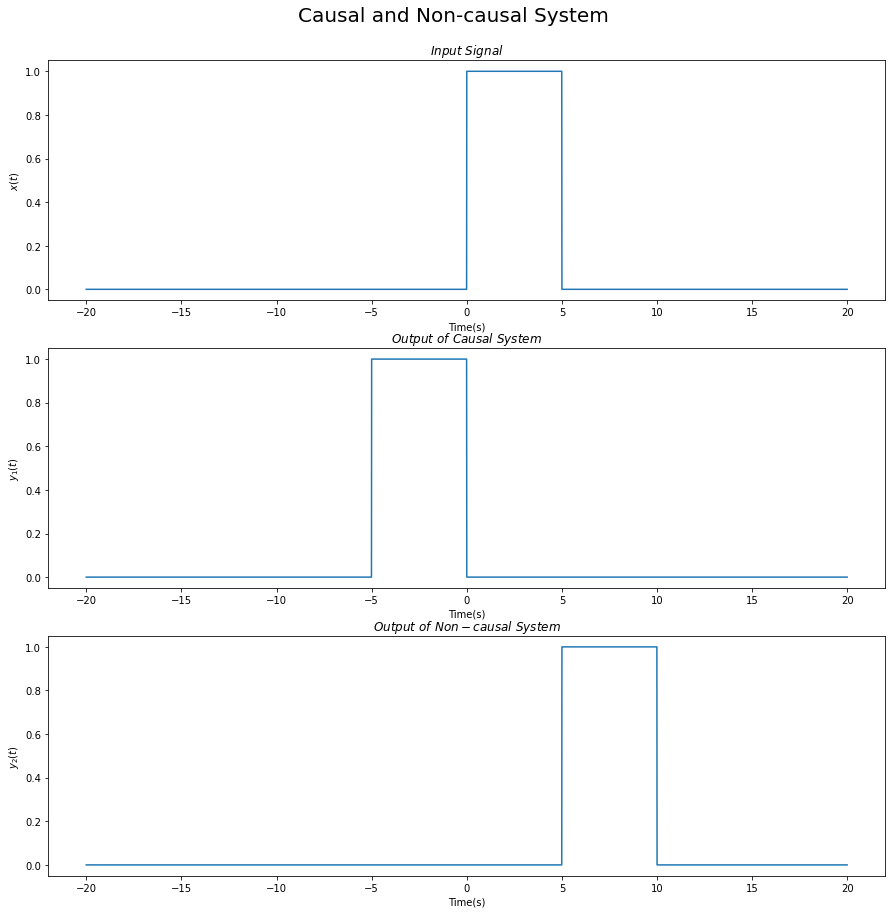

In [31]:
times = np.arange(-20,20, 0.01)

signals = [{'title':'$Input\ Signal$','x':times, 'y':rectSignal(times), 'xlabel':'Time(s)', 'ylabel':'$x(t)$'}, 
           {'title':'$Output\ of\ Causal\ System$','x':times, 'y':rectSignal(times, position = -5), 'xlabel':'Time(s)', 'ylabel':'$y_1(t)$'},
           {'title':'$Output\ of\ Non-causal\ System$','x':times, 'y':rectSignal(times, position = 5), 'xlabel':'Time(s)', 'ylabel':'$y_2(t)$'}]

getReadySubplot(title='Causal and Non-causal System', signals=signals, figSize=(15,15))
plt.show()

<p style="font-size:20px;">$$\begin{aligned}&(ii) Static\ (Memory\ less)\ and\ Dynamic\ (with Memory)\ Systems \end{aligned} $$</p>

In [6]:
def rectSignal(times, position=0,width=5, scale = 1):
    return [scale if t >= position and t <= position + width else 0 for t in times ]

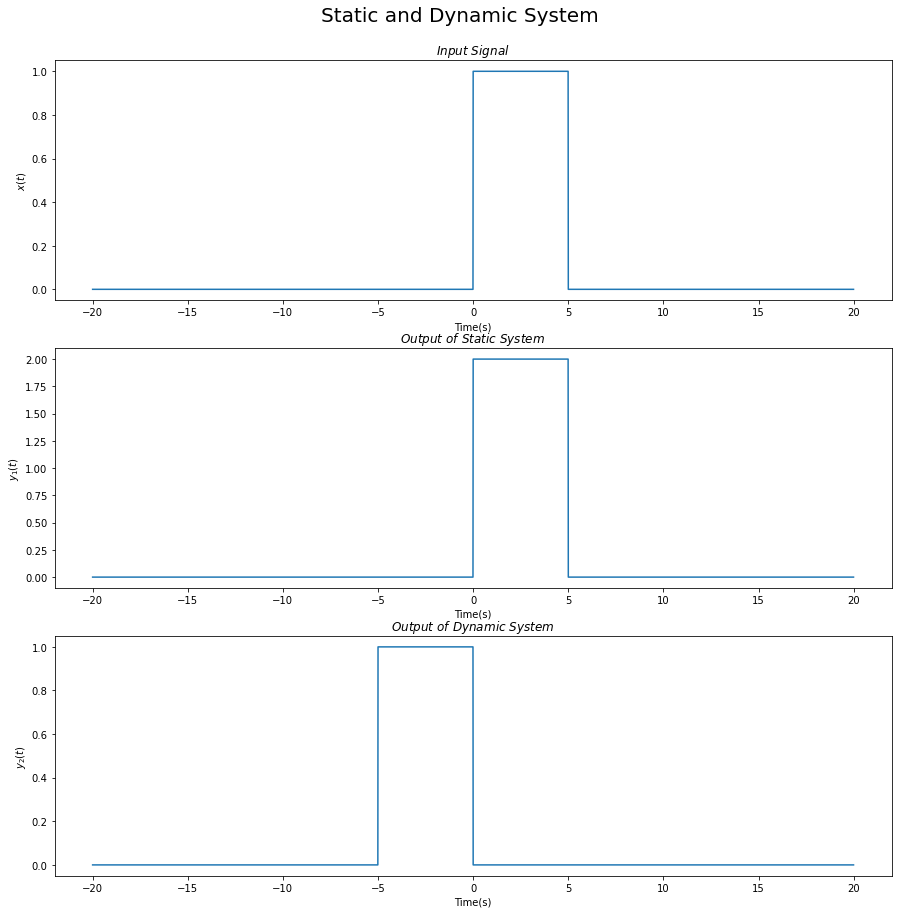

In [7]:
times = np.arange(-20,20, 0.01)

signals = [{'title':'$Input\ Signal$','x':times, 'y':rectSignal(times), 'xlabel':'Time(s)', 'ylabel':'$x(t)$'}, 
           {'title':'$Output\ of\ Static\ System$','x':times, 'y':rectSignal(times, scale = 2), 'xlabel':'Time(s)', 'ylabel':'$y_1(t)$'},
           {'title':'$Output\ of\ Dynamic\ System$','x':times, 'y':rectSignal(times, position = -5), 'xlabel':'Time(s)', 'ylabel':'$y_2(t)$'}]

getReadySubplot(title='Static and Dynamic System', signals=signals, figSize=(15,15))
plt.show()

<p style="font-size:20px;">$$\begin{aligned}&(iii) Linear\ and\ Non-linear\ Systems \end{aligned} $$</p>

In [8]:
def unitStep(times, position=0):
    return [1 if t >= position else 0 for t in times]



<p style="font-size:20px;">$$\begin{aligned}&A\ Linear\ Systems \end{aligned} $$</p>

In [9]:
times = np.arange(-5,5,0.1)
x = unitStep(times)
y = [2 * i for i in x]
x1 = [(i - j) for i,j in zip(unitStep(times), unitStep(times, position=1))]
x2 = [(i - j) for i,j in zip(unitStep(times), unitStep(times, position=2))]


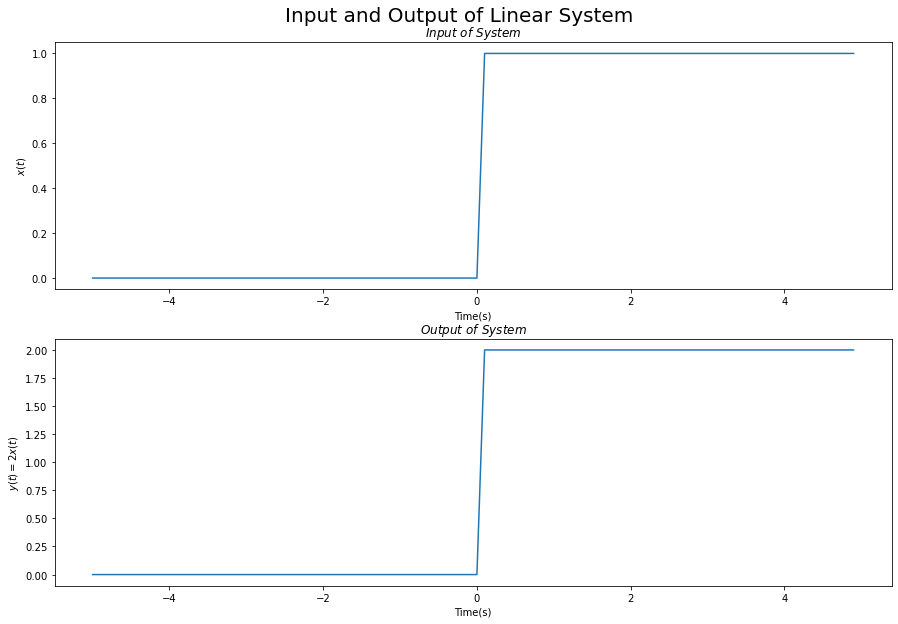

In [10]:
signals = [{'title':'$Input\ of\ System$','x':times, 'y':x, 'xlabel':'Time(s)', 'ylabel':'$x(t)$'}, 
           {'title':'$Output\ of\ System$','x':times, 'y':y, 'xlabel':'Time(s)', 'ylabel':'$y(t) = 2x(t)$'}]

getReadySubplot(title='Input and Output of Linear System', signals=signals, figSize=(15,10))
plt.show()

<p style="font-size:20px">Checking Law of Additivity.</p>

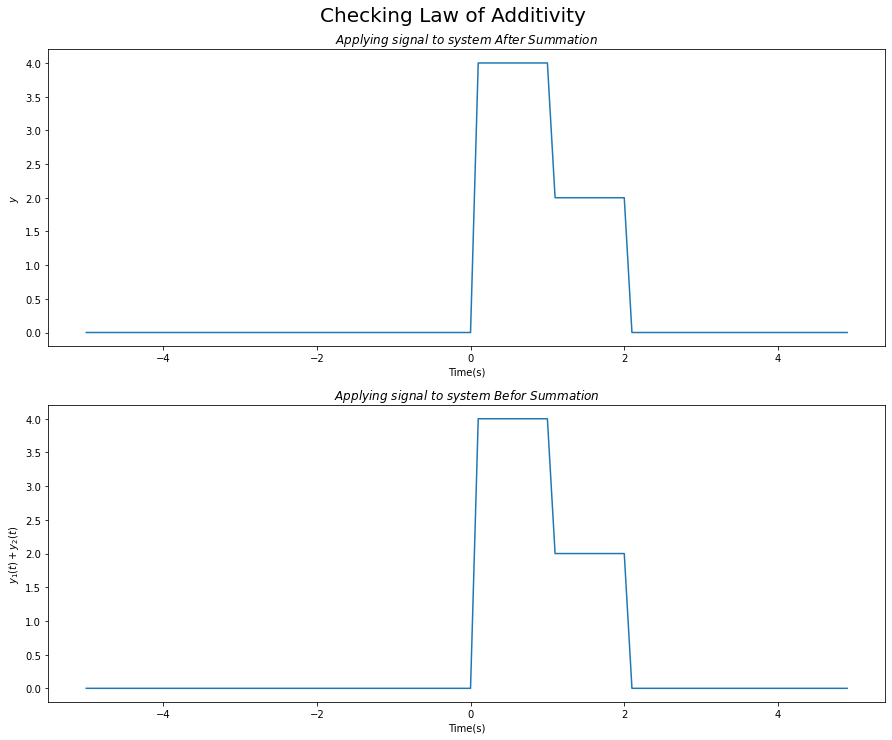

In [11]:
#Addition of the signals in input signal.
addInInput = [(i + j) for i,j in zip(x1,x2)]
yAddInInput = [2 * i for i in addInInput]

#Addition of the signals in ouput signal.
x1AddinOutput = [2 * i for i in x1]
x2AddinOutput = [2 * i for i in x2]
yAddInOutput = [(i+j) for i,j in zip(x1AddinOutput,x2AddinOutput)]

signals = [{'title':'$Applying\ signal\ to\ system\ After\ Summation$','x':times, 'y':yAddInInput, 'xlabel':'Time(s)', 'ylabel':'$y"(t)$'}, 
           {'title':'$Applying\ signal\ to\ system\ Befor\ Summation$','x':times, 'y':yAddInOutput, 'xlabel':'Time(s)', 'ylabel':'$y_1(t) + y_2(t)$'}]

getReadySubplot(title='Checking Law of Additivity', signals=signals, figSize=(15,12))
plt.show()

<p style="font-size:20px">Checking Law of Homogenity.</p>

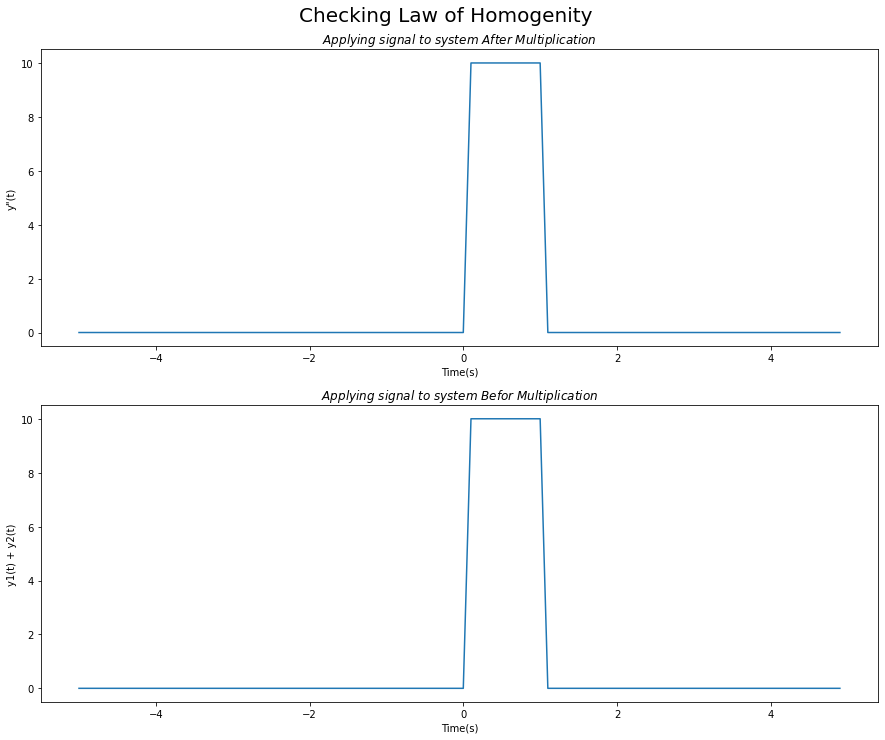

In [12]:
k = 5
#Multiplication in input signal.
multiInInput = [k * i for i in x1]
yMultiInInput = [2 * i for i in multiInInput]

#Addition of the signals in ouput signal.
x1MultiInOutput = [2 * i for i in x1]
yMultiInOutput = [k * i for i in x1MultiInOutput]

signals = [{'title':'$Applying\ signal\ to\ system\ After\ Multiplication$','x':times, 'y':yMultiInInput, 'xlabel':'Time(s)', 'ylabel':'y"(t)'}, 
           {'title':'$Applying\ signal\ to\ system\ Befor\ Multiplication$','x':times, 'y':yMultiInOutput, 'xlabel':'Time(s)', 'ylabel':'y1(t) + y2(t)'}]

getReadySubplot(title='Checking Law of Homogenity', signals=signals, figSize=(15,12))
plt.show()

<p style="font-size:20px;">$$\begin{aligned}&A\ Non-Linear\ Systems \end{aligned} $$</p>

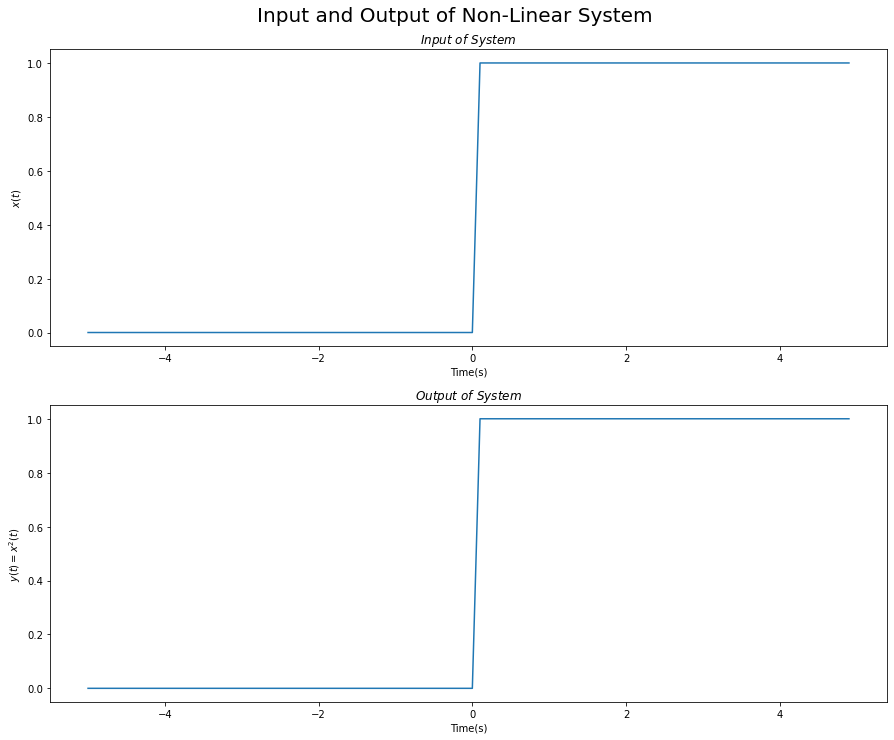

In [13]:
y = [i * i for i in x]
signals = [{'title':'$Input\ of\ System$','x':times, 'y':x, 'xlabel':'Time(s)', 'ylabel':'$x(t)$'}, 
           {'title':'$Output\ of\ System$','x':times, 'y':y, 'xlabel':'Time(s)', 'ylabel':'$y(t) = x^2(t)$'}]

getReadySubplot(title='Input and Output of Non-Linear System', signals=signals, figSize=(15,12))
plt.show()

<p style="font-size:20px">Checking Law of Additivity.</p>

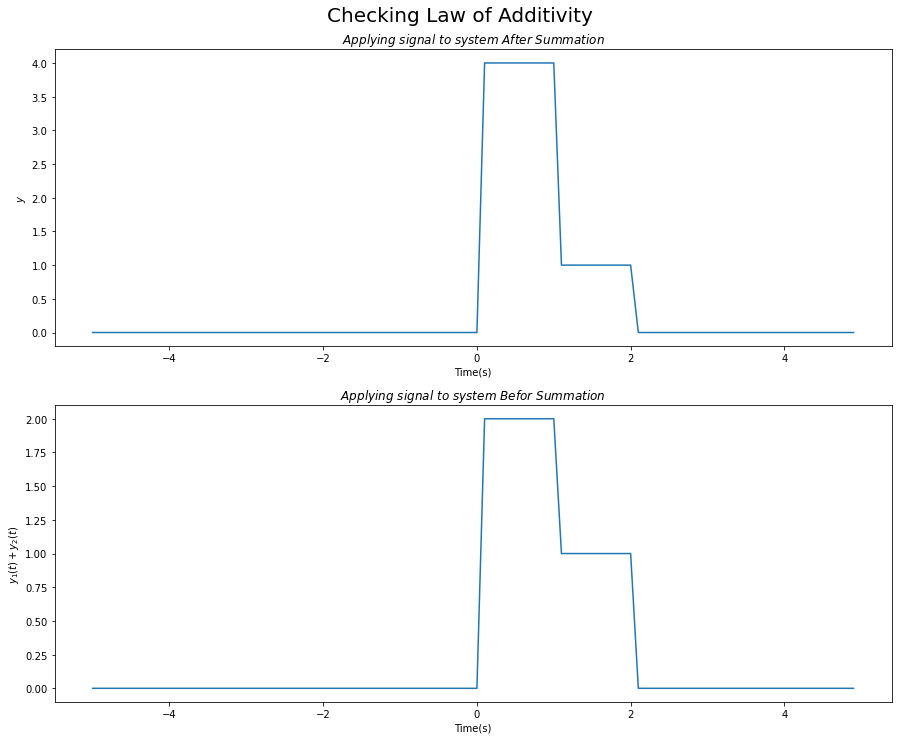

In [14]:
#Addition of the signals in input signal.
addInInput = [(i + j) for i,j in zip(x1,x2)]
yAddInInput = [i * i for i in addInInput]

#Addition of the signals in ouput signal.
x1AddinOutput = [i * i for i in x1]
x2AddinOutput = [i * i for i in x2]
yAddInOutput = [(i+j) for i,j in zip(x1AddinOutput,x2AddinOutput)]

signals = [{'title':'$Applying\ signal\ to\ system\ After\ Summation$','x':times, 'y':yAddInInput, 'xlabel':'Time(s)', 'ylabel':'$y"(t)$'}, 
           {'title':'$Applying\ signal\ to\ system\ Befor\ Summation$','x':times, 'y':yAddInOutput, 'xlabel':'Time(s)', 'ylabel':'$y_1(t) + y_2(t)$'}]

getReadySubplot(title='Checking Law of Additivity', signals=signals, figSize=(15,12))
plt.show()

<p style="font-size:20px">Checking Law of Homogenity.</p>

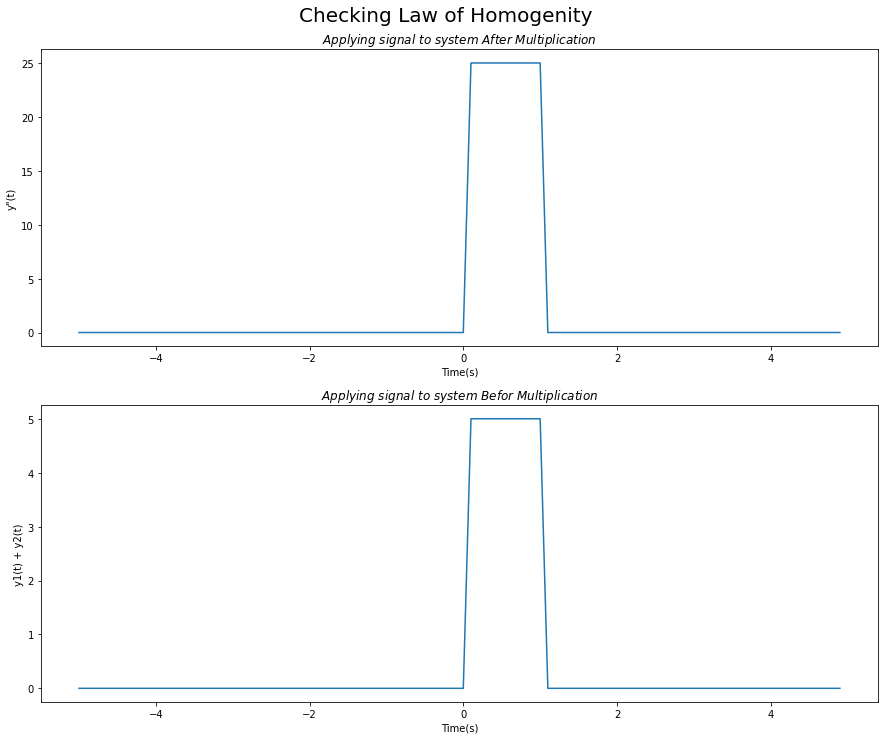

In [15]:
k = 5
#Multiplication in input signal.
multiInInput = [k * i for i in x1]
yMultiInInput = [i * i for i in multiInInput]

#Addition of the signals in ouput signal.
x1MultiInOutput = [i * i for i in x1]
yMultiInOutput = [k * i for i in x1MultiInOutput]

signals = [{'title':'$Applying\ signal\ to\ system\ After\ Multiplication$','x':times, 'y':yMultiInInput, 'xlabel':'Time(s)', 'ylabel':'y"(t)'}, 
           {'title':'$Applying\ signal\ to\ system\ Befor\ Multiplication$','x':times, 'y':yMultiInOutput, 'xlabel':'Time(s)', 'ylabel':'y1(t) + y2(t)'}]

getReadySubplot(title='Checking Law of Homogenity', signals=signals, figSize=(15,12))
plt.show()

<p style="font-size:20px;">$$\begin{aligned}&(vi) Time-Invariant\ and\ Time-Variant\ Systems. \end{aligned} $$</p>

In [16]:
def rectSignal(times, start, end):
    return [1 if t >= start and t <= end else 0 for t in times]

In [17]:
#Time delay by t.
def delay(x, t):
    return x[t*10:] + x[:t*10]

<p style="font-size:20px;">$$\begin{aligned}&A\ Time\ Variant\ System \end{aligned} $$</p>

In [18]:
#Time Scaling by 2.
def timeVariantSystem(times, start, end):
    return rectSignal(times, start/2, end/2)

In [19]:
times = np.arange(-5,5,0.1)
x = rectSignal(times, -2, 2)
y = timeVariantSystem(times, -2, 2)


<p style="font-size:20px">Provide Delay in Output.</p>

In [20]:
yAfterDelay = delay(y, -2)

<p style="font-size:20px">Provide Delay in Input.</p>

In [21]:
xAfterDelay = delay(x, -2)
yOfDelayedInput = timeVariantSystem(times, 0, 4)

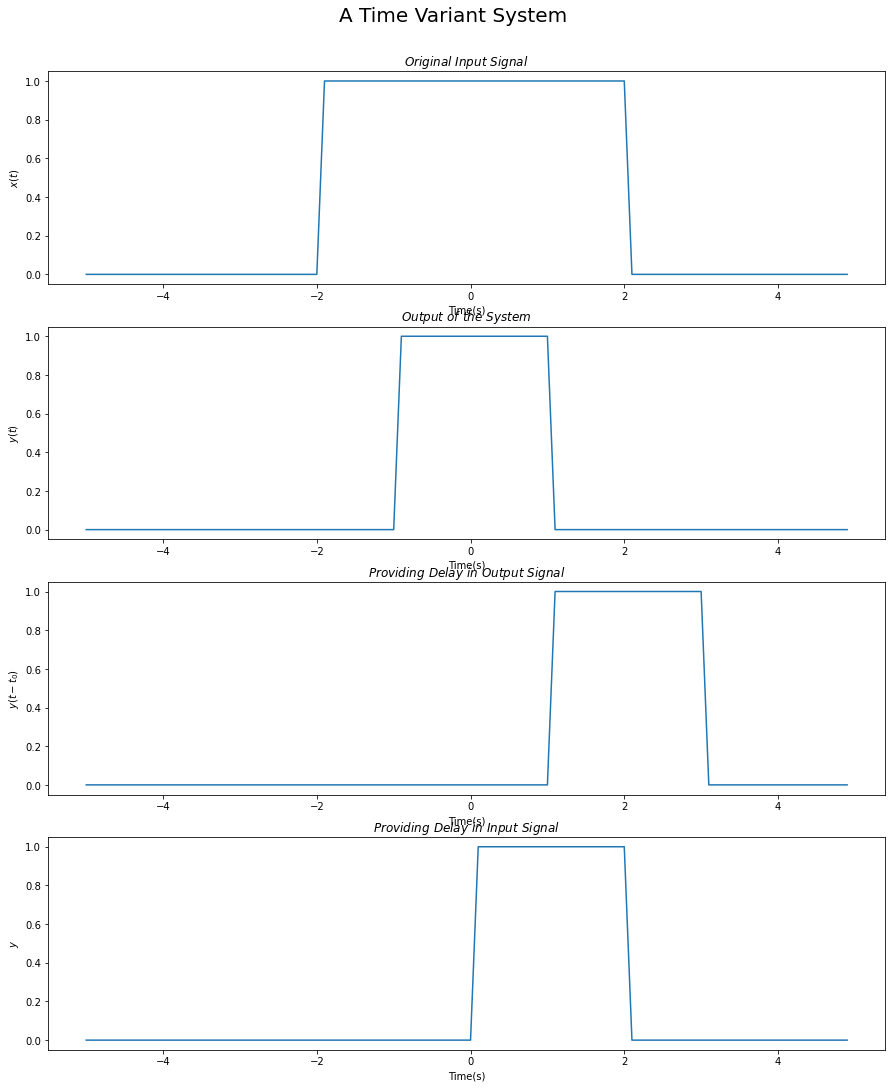

In [22]:
signals = [{'title':'$Original\ Input\ Signal$','x':times, 'y':x, 'xlabel':'Time(s)', 'ylabel':'$x(t)$'}, 
           {'title':'$Output\ of\ the\ System$','x':times, 'y':y, 'xlabel':'Time(s)', 'ylabel':'$y(t)$'},
           {'title':'$Providing\ Delay\ in\ Output\ Signal$','x':times, 'y':yAfterDelay, 'xlabel':'Time(s)', 'ylabel':'$y(t-t_0)$'}, 
           {'title':'$Providing\ Delay\ in\ Input\ Signal$','x':times, 'y':yOfDelayedInput, 'xlabel':'Time(s)', 'ylabel':'$y"(t)$'}]

getReadySubplot(title='A Time Variant System', signals=signals, figSize=(15,18))
plt.show()

<p style="font-size:20px;">$$\begin{aligned}&A\ Time\ Invariant\ System \end{aligned} $$</p>

In [23]:
def timeInvariantSystem(times, start, end):
    return rectSignal(times, start - 2, end - 2)

In [24]:
times = np.arange(-5,5,0.1)
x = rectSignal(times, -2, 2)
y = timeInvariantSystem(times, -2, 2)


<p style="font-size:20px">Provide Delay in Output.</p>

In [25]:
yAfterDelay = delay(y, -2)

<p style="font-size:20px">Provide Delay in Input.</p>

In [26]:
xAfterDelay = delay(x, -2)
yOfDelayedInput = timeInvariantSystem(times, 0, 4)

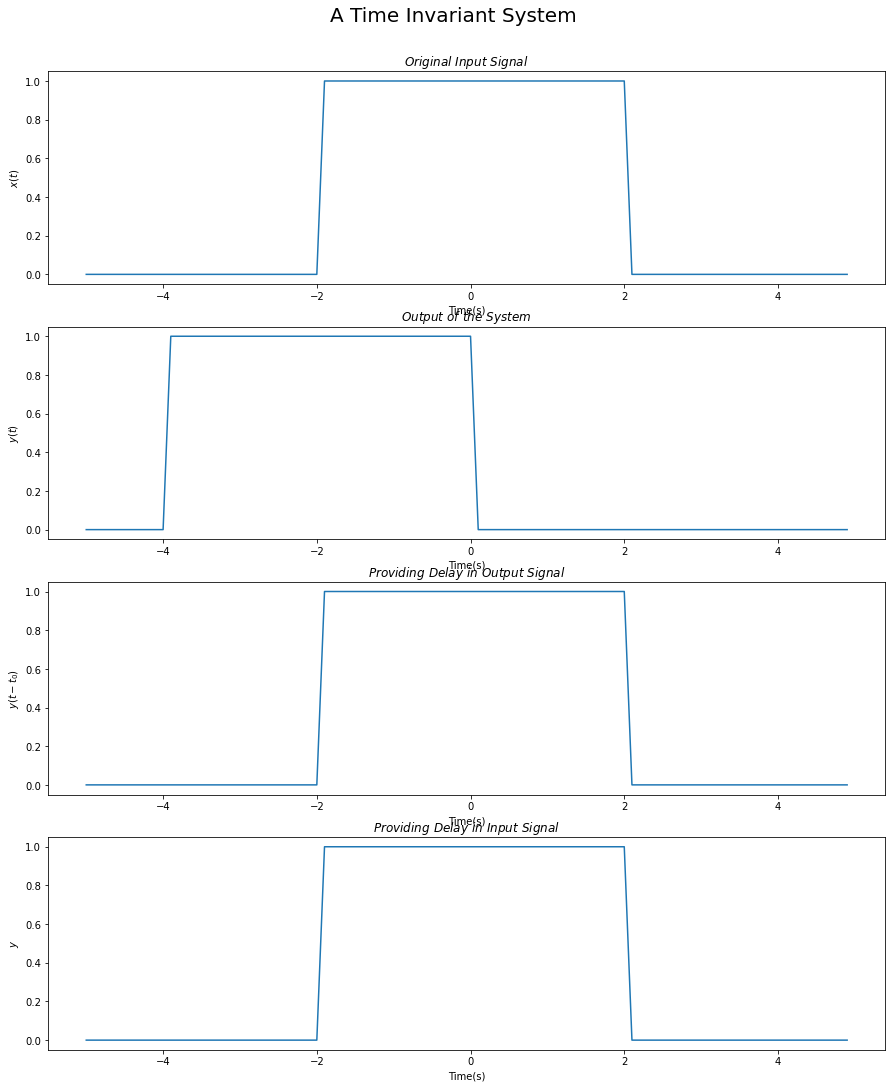

In [27]:
signals = [{'title':'$Original\ Input\ Signal$','x':times, 'y':x, 'xlabel':'Time(s)', 'ylabel':'$x(t)$'}, 
           {'title':'$Output\ of\ the\ System$','x':times, 'y':y, 'xlabel':'Time(s)', 'ylabel':'$y(t)$'},
           {'title':'$Providing\ Delay\ in\ Output\ Signal$','x':times, 'y':yAfterDelay, 'xlabel':'Time(s)', 'ylabel':'$y(t-t_0)$'}, 
           {'title':'$Providing\ Delay\ in\ Input\ Signal$','x':times, 'y':yOfDelayedInput, 'xlabel':'Time(s)', 'ylabel':'$y"(t)$'}]

getReadySubplot(title='A Time Invariant System', signals=signals, figSize=(15,18))
plt.show()